In [84]:
#importing the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle


In [87]:
# loading the dataset 
df = pd.read_csv('/content/water_potability.csv')
df = shuffle(df)  # included shuffle to make sure that the target column is not all stacked with 0's and then 1's
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1855,7.532059,185.506563,24454.725864,5.791102,NaN,393.971890,15.070248,74.780643,3.808570,0
1485,6.198650,246.476962,31369.541641,6.218948,NaN,527.000796,10.522935,62.125469,3.574172,1
2152,NaN,146.250325,25623.340549,7.307749,NaN,464.184606,8.354867,69.001575,3.582882,0
1064,6.225152,169.741172,29533.608826,5.574917,NaN,380.114751,17.595510,75.519059,2.770823,0
2333,NaN,205.666016,27044.959810,4.033934,298.213816,515.754936,9.057549,48.029690,4.067414,1
413,5.742110,188.216604,26831.610411,6.202721,318.376676,498.142386,9.657360,53.508523,3.323070,0
2729,5.566328,153.775514,14574.661100,8.011550,NaN,388.050362,14.200557,75.555219,3.424761,1
2495,NaN,183.488839,12675.938962,9.777807,319.870584,482.445026,13.309723,46.853410,3.240419,0
1985,6.266800,187.829617,27577.213623,9.141597,322.917848,277.050802,13.290252,59.454325,3.652845,1
1920,6.987335,224.034417,13505.033116,5.871180,NaN,479.825497,15.921413,73.064218,3.870293,1


In [88]:
# taking a look of the dataset
df.shape

(3276, 10)

In [89]:
# Looking at the data types
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [90]:
# Looking at the basic stats of the dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [91]:
# Looking for missing values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [92]:
for i in df.columns[df.isna().any(axis=0)]:
  df[i].fillna(df[i].mean(),inplace = True)
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

There are no missing values in the dataset so I am going to move on to the visualizations

Making a bar chart of the count of what is considered drinkable and what is considered not drinkable water in the dataset.

Text(0, 0.5, 'Count')

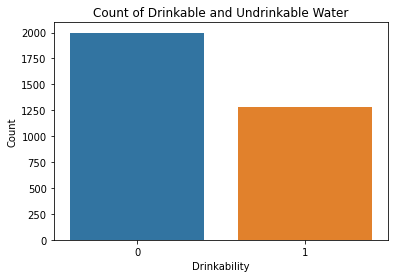

In [140]:
drink_count = df['Potability'].value_counts()
sns.barplot(x=drink_count.index, y= drink_count.values, alpha = 1)
plt.title('Count of Drinkable and Undrinkable Water')
plt.xlabel('Drinkability')
plt.ylabel('Count')
# the 0's mean Gonen rice and the 1's mean Jasmine rice

Making a histogram of the Hardness of water. Hardness of water is caused by the calcium and magnesium salts dissolving in water.


Text(0.5, 1.0, 'Distribution of hardness')

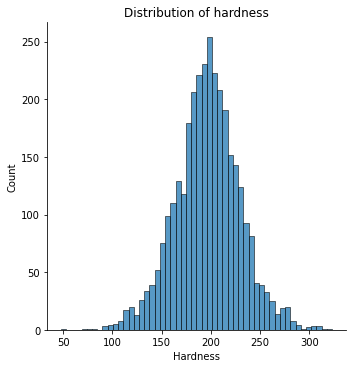

In [142]:
sns.displot(x='Hardness', data=df)
plt.title("Distribution of hardness")

Making a histogram of the solids in water. Total Dissolved Solids (TDS) is the amount of inorganic and some organic minerals dissolved in water. For drinking purposes the recommended amount is 500 ppm to 1000 ppm.

Text(0.5, 1.0, 'Distribution of Solids')

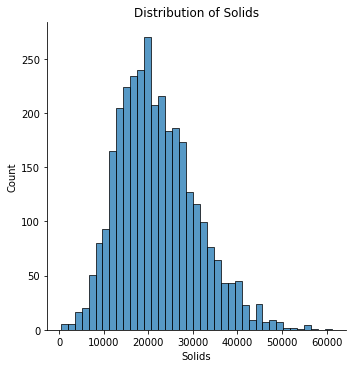

In [143]:
sns.displot(x='Solids', data=df)
plt.title("Distribution of Solids")

Making a histogram of the Trihalomethanes (THM) in the water. THMs are chemicals found in water that has been treated with chlorine. THM levels up to 80 ppm are considered safe to drink.

Text(0.5, 1.0, 'Distribution of Trihalomethanes')

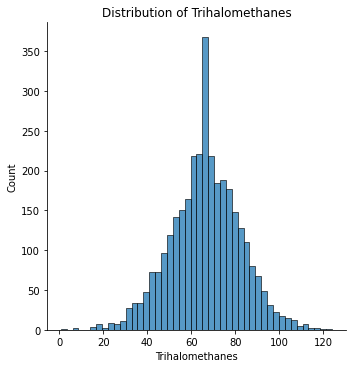

In [144]:
sns.displot(x='Trihalomethanes', data=df)
plt.title('Distribution of Trihalomethanes')

Making a correlation heatmap of the columns in this dataset. The lower the correlation value the better because it would mean there is no multicollinearity between the independent variables in the dataset. 

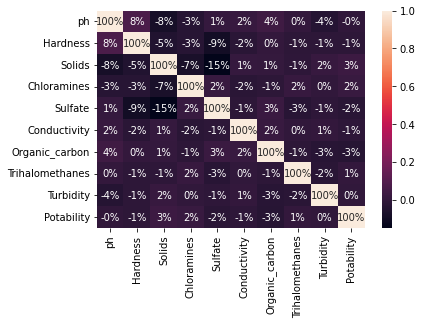

In [145]:
sns.heatmap(df.corr(), annot=True, fmt ='.0%')

All the correlations are low so there is no multicollinearity in this dataset.

In [146]:
X= df.iloc[:,:-1].values
X

array([[7.53205858e+00, 1.85506563e+02, 2.44547259e+04, ...,
        1.50702481e+01, 7.47806430e+01, 3.80856992e+00],
       [6.19865034e+00, 2.46476962e+02, 3.13695416e+04, ...,
        1.05229346e+01, 6.21254690e+01, 3.57417202e+00],
       [7.08079450e+00, 1.46250325e+02, 2.56233405e+04, ...,
        8.35486712e+00, 6.90015747e+01, 3.58288237e+00],
       ...,
       [6.91486815e+00, 2.06249937e+02, 1.03433788e+04, ...,
        1.61737302e+01, 6.82469447e+01, 2.98861144e+00],
       [5.92373995e+00, 2.00561213e+02, 3.33060125e+04, ...,
        1.37978697e+01, 6.34634088e+01, 3.88446037e+00],
       [6.48399451e+00, 1.80445051e+02, 2.90327811e+04, ...,
        1.78858773e+01, 7.59397157e+01, 2.68864329e+00]])

Getting the target values and setting them as the y variable.

In [147]:
y = df.iloc[:,-1:]
y.values

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

Splitting the dataset so that 30% of it will be used as test. (random_state=20)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 20)

Standarding the features so that there are no skewedness between the features of the dataset.

In [149]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the data tree model

In [150]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Performing a 5 fold cross validation on the decision tree model.

In [151]:
k = 5
kf = KFold(n_splits=k)
result_dt = cross_val_score(dt, X_train, y_train, cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result_dt.mean()}')

 Avg accuracy:0.5992236778262979


Making predictions with the decision tree

In [152]:
y_pred_dt = dt.predict(X_test)

Decision Tree Classification Report



In [153]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67       609
           1       0.44      0.41      0.43       374

    accuracy                           0.58       983
   macro avg       0.55      0.55      0.55       983
weighted avg       0.57      0.58      0.58       983



Creating the random forest model

In [154]:
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=20)
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=10, random_state=20)

Performing a 5 fold cross validation for the random forest

In [155]:
k = 5
kf = KFold(n_splits=k)
result_rf = cross_val_score(rf, X_train, y_train.values.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result_rf.mean()}')

 Avg accuracy:0.6380245645079963


Predictions with the random forest model

In [156]:
y_pred_rf = rf.predict(X_test)

Random Forest Classification Report

In [157]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74       609
           1       0.52      0.26      0.35       374

    accuracy                           0.63       983
   macro avg       0.59      0.56      0.54       983
weighted avg       0.60      0.63      0.59       983



Training the KNN model

In [158]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

Performing a 5 fold cross validation for KNN model

In [159]:
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(knn, X_train, y_train.values.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6349801638268117


KNN model making classifications

In [160]:
y_pred = knn.predict(X_test)

KNN Classification Report

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       609
           1       0.51      0.38      0.43       374

    accuracy                           0.63       983
   macro avg       0.59      0.58      0.58       983
weighted avg       0.61      0.63      0.61       983



Training the support vector machine model with the linear kernel, RBF kernel, Poly kernel, and Sigmoid kernel

In [162]:
linear = svm.SVC(kernel='linear', C=4, decision_function_shape='ovo').fit(X_train, y_train.values.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train.values.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train.values.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train.values.ravel())

Performing a 5 fold cross validation on linear SVM


In [163]:
result = cross_val_score(linear, X_train, y_train.values.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6057386952840331


Performing a 5 fold cross validation on RBF SVM

In [164]:
result = cross_val_score(rbf, X_train, y_train.values.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.614028978888984


Performing a 5 fold cross validation on Poly SVM

In [165]:
result = cross_val_score(poly, X_train, y_train.values.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6135961031671281


Performing a 5 fold cross validation on Sigmoid SVM 

In [166]:
result = cross_val_score(sig, X_train, y_train.values.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.5573431895805386


Linear SVM Classification Report

In [167]:
svm_linear_pred = linear.predict(X_test)

print(classification_report(y_test, svm_linear_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       609
           1       0.00      0.00      0.00       374

    accuracy                           0.62       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.38      0.62      0.47       983



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RBF SVM Classification Report

In [168]:
svm_rbf_pred = rbf.predict(X_test)
print(classification_report(y_test, svm_rbf_pred))

              precision    recall  f1-score   support

           0       0.62      0.94      0.74       609
           1       0.35      0.06      0.10       374

    accuracy                           0.60       983
   macro avg       0.48      0.50      0.42       983
weighted avg       0.52      0.60      0.50       983



Poly SVM Classification Report

In [169]:
svm_poly_pred = poly.predict(X_test)
print(classification_report(y_test, svm_poly_pred))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76       609
           1       0.52      0.09      0.15       374

    accuracy                           0.62       983
   macro avg       0.58      0.52      0.46       983
weighted avg       0.59      0.62      0.53       983



Sigmoid SVM Classification Report

In [170]:
svm_sig_pred = sig.predict(X_test)
print(classification_report(y_test, svm_sig_pred))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64       609
           1       0.36      0.29      0.32       374

    accuracy                           0.53       983
   macro avg       0.48      0.48      0.48       983
weighted avg       0.51      0.53      0.52       983



Training the Naive Bayes model with Gaussian distribution

In [171]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())

GaussianNB()

Performing a 5 fold cross validation on Gaussian Naive Bayes Model

In [172]:
result = cross_val_score(gnb, X_train, y_train.values.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6192720076871117


Gaussian Naive Bayes Classification Report

In [173]:
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74       609
           1       0.53      0.25      0.34       374

    accuracy                           0.63       983
   macro avg       0.59      0.56      0.54       983
weighted avg       0.60      0.63      0.59       983



Training the logistic regression model

In [174]:
lr = LogisticRegression()

lr.fit(X_train, y_train.values.ravel())

LogisticRegression()

Performing 5 fold cross validatoin for Logistic Regression

In [175]:
result = cross_val_score(lr, X_train, y_train.values.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6114079401775265


Logistic Regression Classification Report

In [176]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       609
           1       0.82      0.02      0.05       374

    accuracy                           0.63       983
   macro avg       0.72      0.51      0.41       983
weighted avg       0.70      0.63      0.49       983



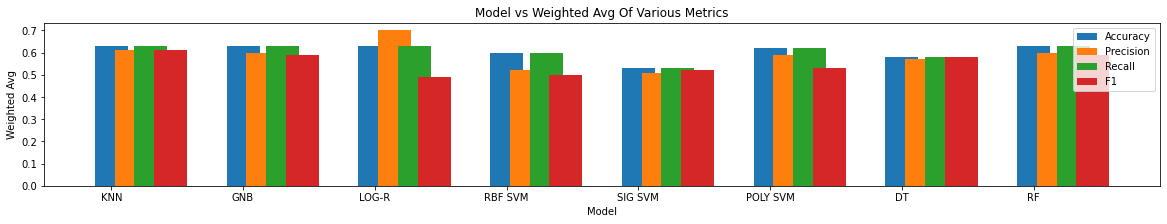

In [177]:
X   = ['KNN','GNB','LOG-R','RBF SVM', 'SIG SVM', 'POLY SVM', 'DT', 'RF']

accuracy =  [.63, .63, .63, .60, .53, .62, .58, .63]
precision = [.61, .60, .70, .52, .51, .59, .57, .60]
recall =    [.63, .63, .63, .60, .53, .62, .58, .63]
f1 =        [.61, .59, .49, .50, .52, .53, .58, .59]

X_axis = np.arange(len(X))

spacing= 0.15

plt.rcParams["figure.figsize"] = (20,3)

plt.bar(X_axis, accuracy, 0.25, label = 'Accuracy')
plt.bar(X_axis + spacing, precision, 0.25, label = 'Precision')
plt.bar(X_axis + spacing *2, recall, 0.25, label = 'Recall')
plt.bar(X_axis + spacing *3, f1, 0.25, label = 'F1')

plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()

In [ ]:
#footnote: Linear SVM has been left out of the graph because I ran into a problem with splitting the dataset where for Linear SVM there are not enough 1's in the split to perform the model.